In [138]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 200
from scipy import stats, integrate, optimize, interpolate

In [122]:
import sim_steady_state as sim

## Exercise 1: compare example lognormal and Pareto distributions with same mean
Arbitrary shape parameters and variances, though (can't match variance for $\alpha<2$ since variance of Pareto is infinite).

In [37]:
alpha = 1.5
xm = 1
mean_pareto = xm*alpha/(alpha-1)

def f_pareto(x):
    return alpha*xm**alpha / x**(alpha+1)

def F_pareto(x):
    return 1 - (xm/x)**alpha

In [52]:
mean = mean_pareto

In [53]:
sigma_logx = 0.7
mu_logx = np.log(mean) - sigma_logx**2/2

def f_lognormal(x):
    return 1/(x*sigma_logx*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu_logx)**2/(2*sigma_logx**2))

def F_lognormal(x):
    return stats.norm.cdf(np.log(x), mu_logx, sigma_logx)

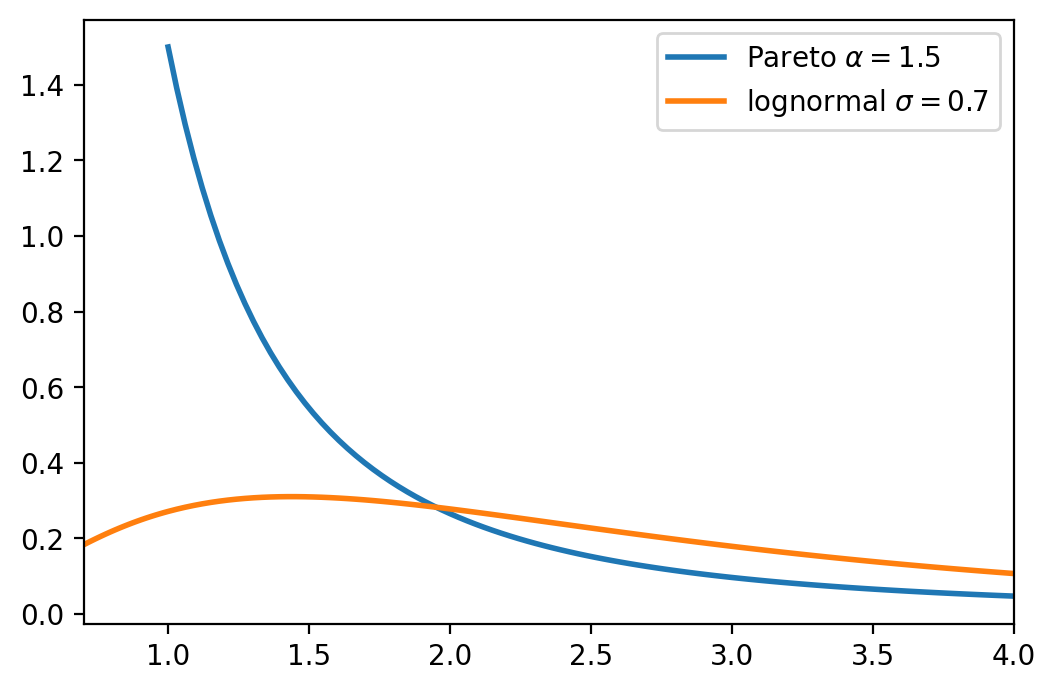

In [29]:
xs = np.linspace(1, 4, 100)
xs_longer = np.concatenate((np.linspace(0.7, 1, 20), xs))
plt.plot(xs, f_pareto(xs), linewidth=2, label=r'Pareto $\alpha=1.5$')
plt.plot(xs_longer, f_lognormal(xs_longer), linewidth=2, label=r'lognormal $\sigma=0.7$')
plt.xlim(xs_longer[0], xs[-1])
plt.legend();

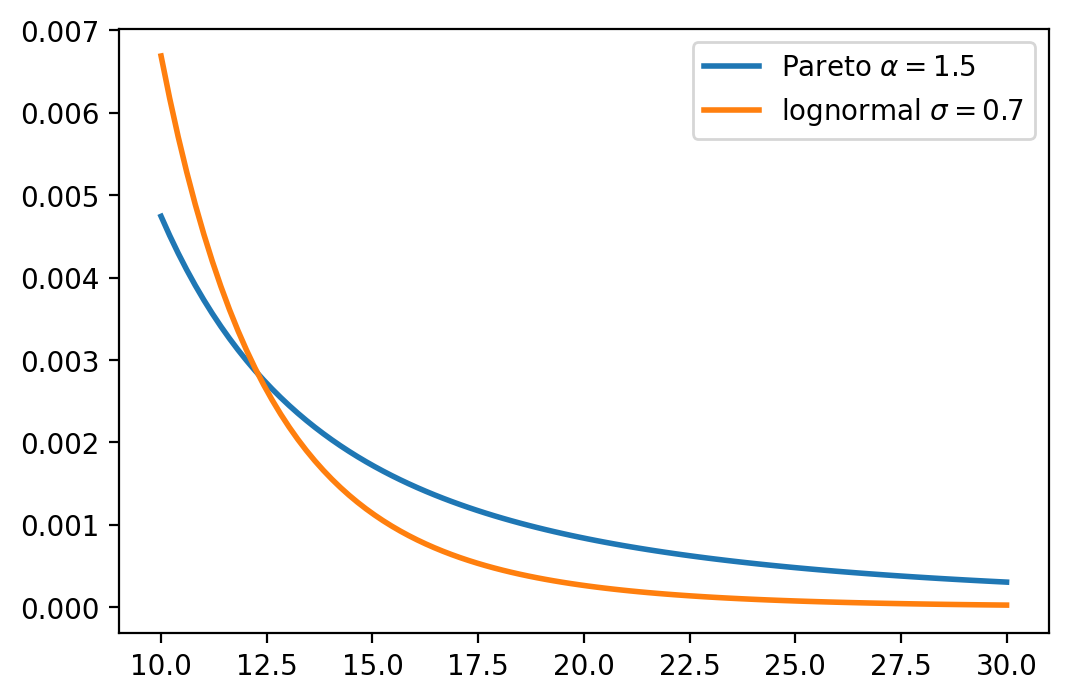

In [35]:
xs = np.linspace(10, 30, 100)
plt.plot(xs, f_pareto(xs), linewidth=2, label=r'Pareto $\alpha=1.5$')
plt.plot(xs, f_lognormal(xs), linewidth=2, label=r'lognormal $\sigma=0.7$')
plt.legend();

Now let's look at the remaining CDF.

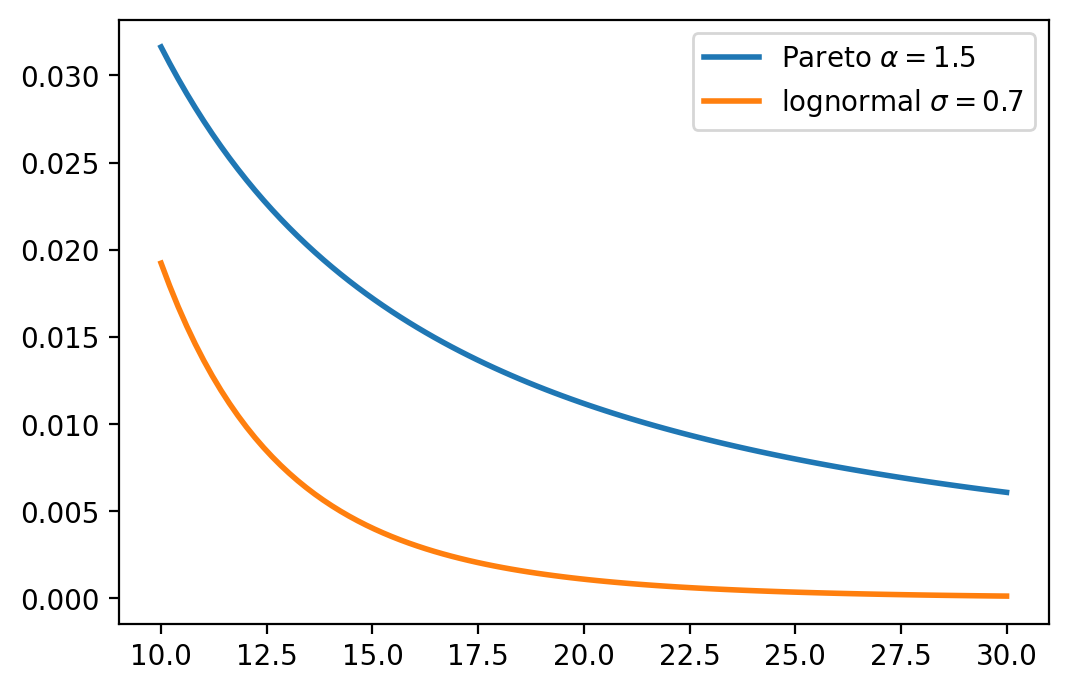

In [40]:
xs = np.linspace(10, 30, 100)
plt.plot(xs, 1-F_pareto(xs), linewidth=2, label=r'Pareto $\alpha=1.5$')
plt.plot(xs, 1-F_lognormal(xs), linewidth=2, label=r'lognormal $\sigma=0.7$')
plt.legend();

In [41]:
1-F_lognormal(xs[-1])

0.00013663315612644222

Let's plot Lorenz curves for the two now.

We already have the CDF $F(x)$. We know that the CDF of dollars for the Pareto will have shape parameter $\alpha-1$. Let's get the CDF of dollars for lognormal by integrating $xf(x)$. Could be much more efficient than this (a lot of redundancy in integrating over and over!).

In [83]:
def F_dol_pareto(x):
    return 1 - (xm/x)**(alpha-1)

F_dol_lognormal = lambda x: integrate.quad(lambda y: y*f_lognormal(y), 0, x)[0]/mean

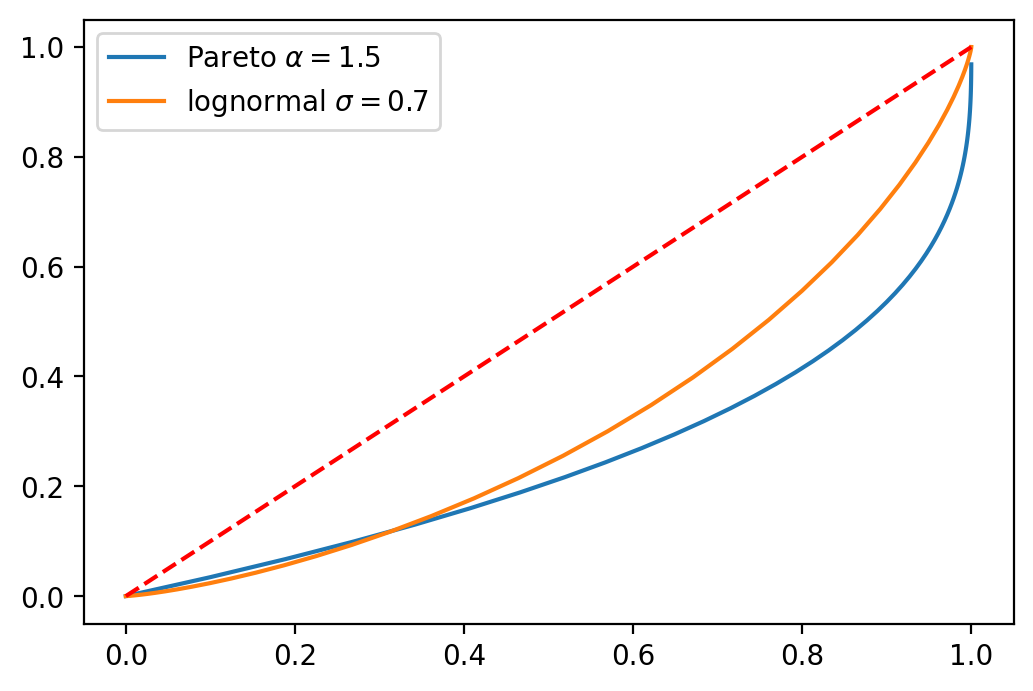

In [89]:
xs_pareto = np.geomspace(1, 100000, 100)
plt.plot(F_pareto(xs), F_dol_pareto(xs), label=r'Pareto $\alpha=1.5$')

xs_ln = np.geomspace(0.01, 100, 100)
plt.plot(F_lognormal(xs_ln), [F_dol_lognormal(x) for x in xs_ln], label=r'lognormal $\sigma=0.7$')
plt.legend()

plt.plot([0, 1], [0, 1], '--', color='red');

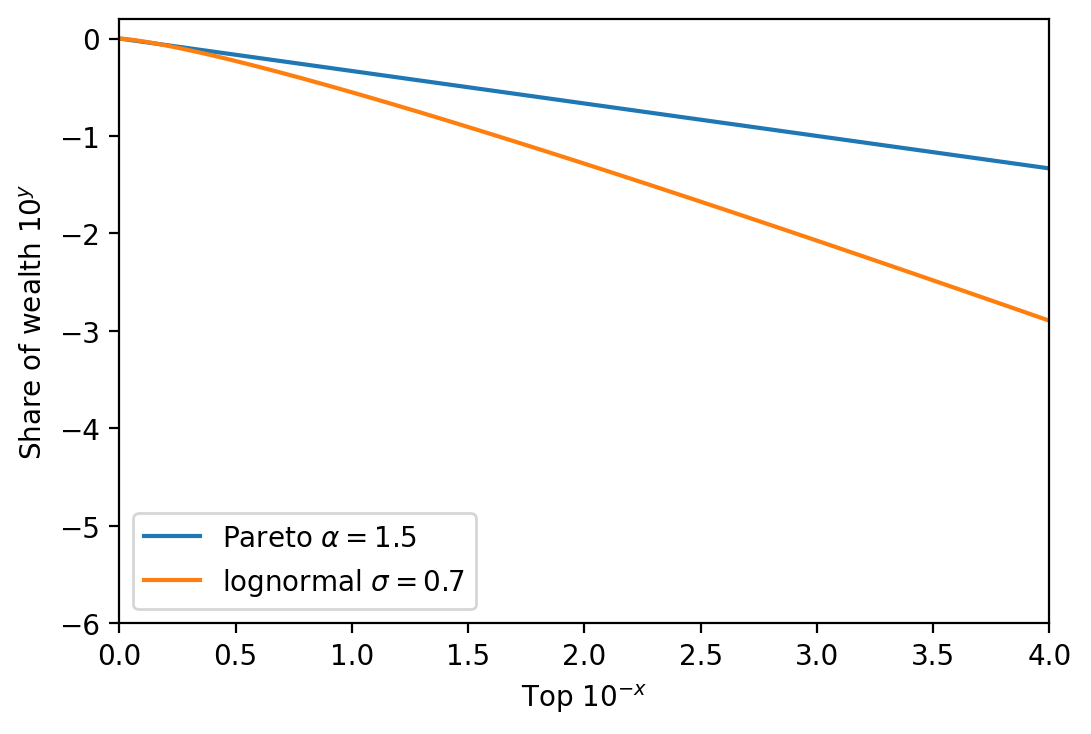

In [121]:
plt.plot(-np.log10(1-F_pareto(xs)), np.log10(1-F_dol_pareto(xs)), label=r'Pareto $\alpha=1.5$')
plt.plot(-np.log10(1-F_lognormal(xs_ln)), np.log10([1-F_dol_lognormal(x) for x in xs_ln]), label=r'lognormal $\sigma=0.7$')
plt.xlim(0, 4)
plt.ylim(-6, 0.2)
plt.xlabel(r'Top $10^{-x}$')
plt.ylabel(r'Share of wealth $10^y$')
plt.legend();

In [103]:
0.0001**((alpha-1)/alpha)

0.046415888336127795

In [104]:
np.log10(0.0001**((alpha-1)/alpha))

-1.3333333333333333

In [109]:
xstar = optimize.brentq(lambda x: F_lognormal(x) - 0.99, 0.01, 20)
xstar

11.96583852624781

In [111]:
1-F_dol_lognormal(xstar)

0.051937836441288354

## Exercise 2: wealth inequality complementary CDFs in our model

In [123]:
ss = sim.steady_state(**sim.example_calibration())

In [130]:
D = ss['D'].sum(axis=0)

/var/folders/n2/d22qkg455_dfwq9kmnc0pkrr0000gn/T/ipykernel_36372/1828661061.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(-np.log10(1-D.cumsum()), np.log10(1-(D*ss['a_grid']).cumsum()/ss['A']), linewidth=2)


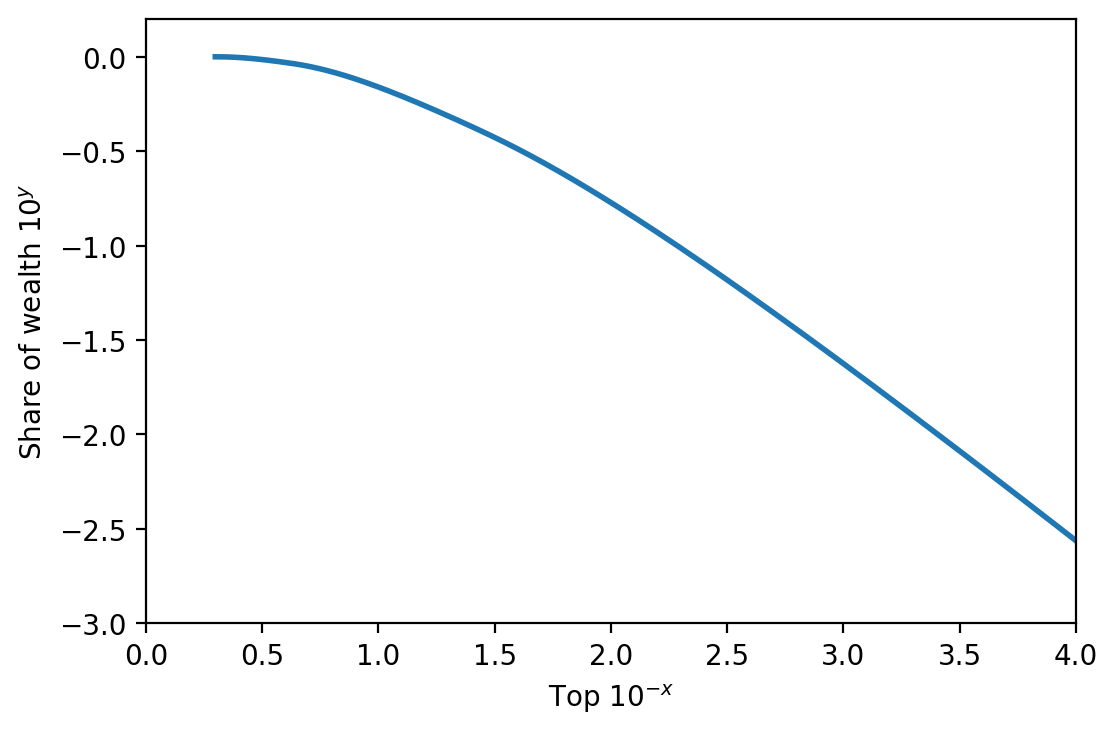

In [137]:
plt.plot(-np.log10(1-D.cumsum()), np.log10(1-(D*ss['a_grid']).cumsum()/ss['A']), linewidth=2)
plt.xlim(0, 4)
plt.ylim(-3, 0.2)
plt.xlabel(r'Top $10^{-x}$')
plt.ylabel(r'Share of wealth $10^y$');

In [151]:
f = interpolate.CubicSpline(-np.log10(1-D[:330].cumsum()), np.log10(1-(D[:330]*ss['a_grid'][:330]).cumsum()/ss['A']))
10**(f(2))

0.16893478238725793

In [152]:
10**(f(4))

0.0027489506199883827